In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
diabetes = pd.read_csv('diabetic_data.csv')

In [19]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [21]:
# to keep only columns of interest(demographic data, medications and readmitted)
diabetes = diabetes.loc[:, ~diabetes.columns.isin(['encounter_id','patient_nbr','weight','admission_type_id',
                                                   'discharge_disposition_id','admission_source_id','payer_code',
                                                   'medical_specialty','diag_1','diag_2','diag_3','number_diagnoses',
                                                   'max_glu_serum','A1Cresult','change','diabetesMed'])]

In [22]:
diabetes.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,No,No,No,Up,No,No,No,No,No,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,...,No,No,No,No,No,No,No,No,No,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,No,No,No,Up,No,No,No,No,No,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,No,No,No,Steady,No,No,No,No,No,NO


In [31]:
diabetes.age = diabetes.age.replace({'[0-10)':'0-10','[10-20)':'11-20','[20-30)':'21-30','[30-40)':'31-40',
                                     '[40-50)':'41-50','[50-60)':'51-60','[60-70)':'61-70','[70-80)':'71-80',
                                     '[80-90)':'81-90','[90-100)':'91-100'})

In [32]:
diabetes.loc[0:100000:10000]

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted
0,Caucasian,Female,0-10,1,41,0,1,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
10000,Caucasian,Female,81-90,9,61,1,14,0,0,0,...,No,No,No,No,No,No,No,No,No,>30
20000,Caucasian,Male,61-70,9,56,2,30,0,0,1,...,No,No,No,Steady,No,No,No,No,No,>30
30000,Caucasian,Male,41-50,4,37,2,9,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
40000,Caucasian,Female,41-50,2,39,3,18,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
50000,Caucasian,Female,61-70,4,43,0,13,1,0,0,...,No,No,No,Steady,No,No,No,No,No,>30
60000,Caucasian,Male,41-50,2,37,0,16,0,0,3,...,No,No,No,Steady,No,No,No,No,No,NO
70000,Other,Male,41-50,2,55,1,9,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
80000,Caucasian,Male,71-80,1,22,6,17,0,0,0,...,No,No,No,No,No,No,No,No,No,>30
90000,AfricanAmerican,Male,51-60,2,48,0,17,0,1,1,...,No,No,No,Down,No,No,No,No,No,NO


### categorical features

#### race, gender and age

In [33]:
diabetes.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [34]:
diabetes.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [35]:
diabetes.age.value_counts()

71-80     26068
61-70     22483
51-60     17256
81-90     17197
41-50      9685
31-40      3775
91-100     2793
21-30      1657
11-20       691
0-10        161
Name: age, dtype: int64

'?' in race and 'Unknown/Invalid' in gender are treated as NA's. Will remove them from the dataset

In [76]:
diabetes.drop(diabetes[diabetes.race == '?'].index, inplace = True)
diabetes.drop(diabetes[diabetes.gender == 'Unknown/Invalid'].index, inplace = True)

In [275]:
age = pd.DataFrame(diabetes.age.value_counts())

Text(0.5, 0.98, 'demographic data')

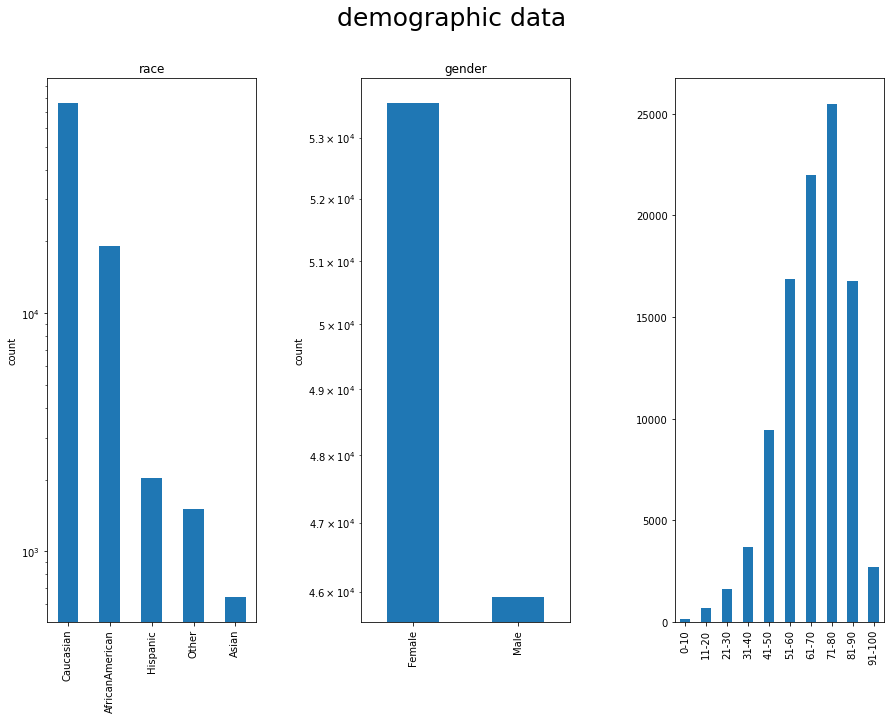

In [273]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

diabetes.race.value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('race')
ax[0].set_ylabel('count')
ax[0].set_yscale('log')
diabetes.gender.value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('gender')
ax[1].set_ylabel('count')
ax[1].set_yscale('log')
age_order = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
ax[2] = age.age.loc[age_order].plot(kind="bar")

plt.subplots_adjust(wspace=0.5)
plt.suptitle('demographic data', size=25)

#### target variable - readmitted 

In [53]:
diabetes.readmitted.value_counts()

0    53316
1    46176
Name: readmitted, dtype: int64

'>30' and '<30' are treated as YES - Yes 1 and No 0 to look at readmission ratio

In [54]:
diabetes.readmitted = diabetes.readmitted.replace('NO',0)
diabetes.readmitted = diabetes.readmitted.replace(['<30', '>30'],1)

In [267]:
diabetes.readmitted.value_counts()

0    53316
1    46176
Name: readmitted, dtype: int64

In [270]:
readmitted = pd.DataFrame(diabetes.readmitted.value_counts())
readmitted['percentage'] = [53316/(53316+46176),46176/(53316+46176)]
readmitted_percentage= pd.DataFrame(readmitted.percentage)

Text(0.6, 0.1, '46.4%')

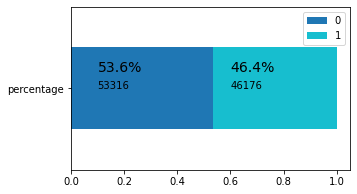

In [279]:
readmitted_percentage.T.plot(kind='barh', stacked=True, colormap='tab10', figsize=(5, 3))
plt.text(0.1,0, '53316')
plt.text(0.6,0, '46176')
plt.text(0.1,0.1, '53.6%', size=14)
plt.text(0.6,0.1, '46.4%', size=14)

#### 23 medication features

In [56]:
diabetes.loc[:,'metformin':'metformin-pioglitazone'].head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
2,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
4,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No


'No' is treated as 0 and 'Up', 'Down' and 'Steady' are treated as 1 for all 23 medication features

In [57]:
diabetes.loc[:,'metformin':'metformin-pioglitazone'] = diabetes.loc[:,'metformin':'metformin-pioglitazone'].replace('No',0)
diabetes.loc[:,'metformin':'metformin-pioglitazone'] = diabetes.loc[:,'metformin':'metformin-pioglitazone'].replace(['Up','Down','Steady'],1)

In [58]:
drugs = diabetes.loc[:,'metformin':'metformin-pioglitazone']
drugs.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


metformin                   19521.0
repaglinide                  1529.0
nateglinide                   696.0
chlorpropamide                 85.0
glimepiride                  5034.0
acetohexamide                   1.0
glipizide                   12399.0
glyburide                   10379.0
tolbutamide                    22.0
pioglitazone                 7176.0
rosiglitazone                6227.0
acarbose                      302.0
miglitol                       38.0
troglitazone                    3.0
tolazamide                     39.0
examide                         NaN
citoglipton                     NaN
insulin                     52997.0
glyburide-metformin           680.0
glipizide-metformin            13.0
glimepiride-pioglitazone        1.0
metformin-rosiglitazone         NaN
metformin-pioglitazone          1.0
Name: 1, dtype: float64

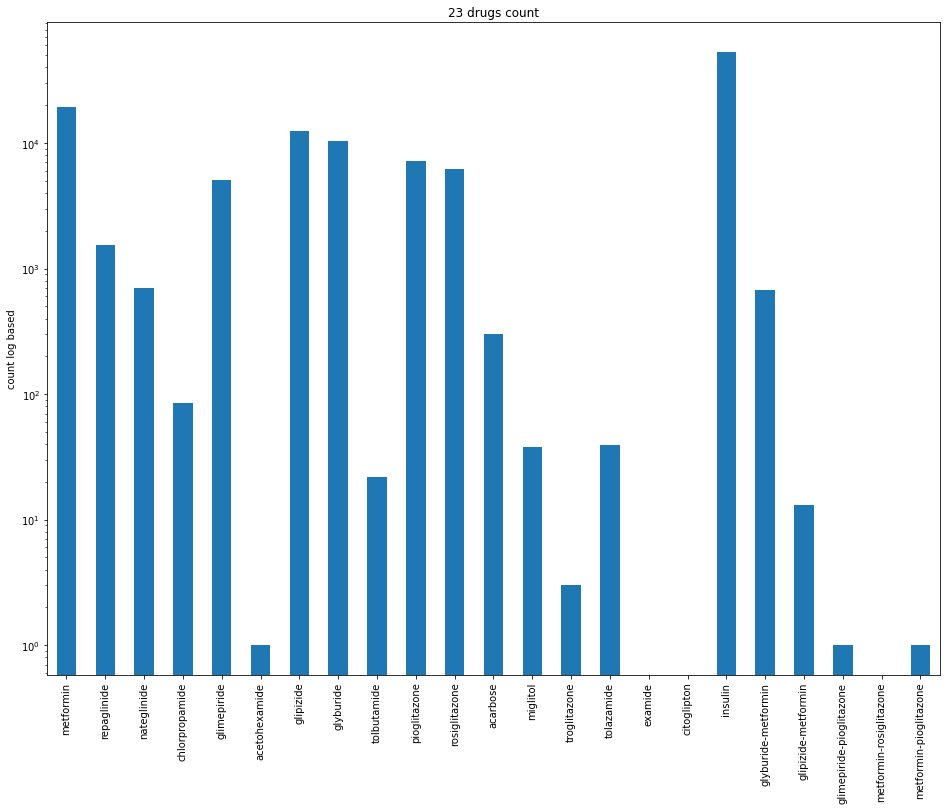

In [311]:
count=[]
for i in range(len(drugs.columns)):
    count.append(drugs.iloc[:,i].value_counts())
count = pd.DataFrame(count)
count[1].plot.bar(figsize=(16,12),title='23 drugs count', ylabel='count log based', log=True)
count[1]

### plotting categorical features against target variable readmitted

Text(0.5, 0.98, 'demographic data with readmission info')

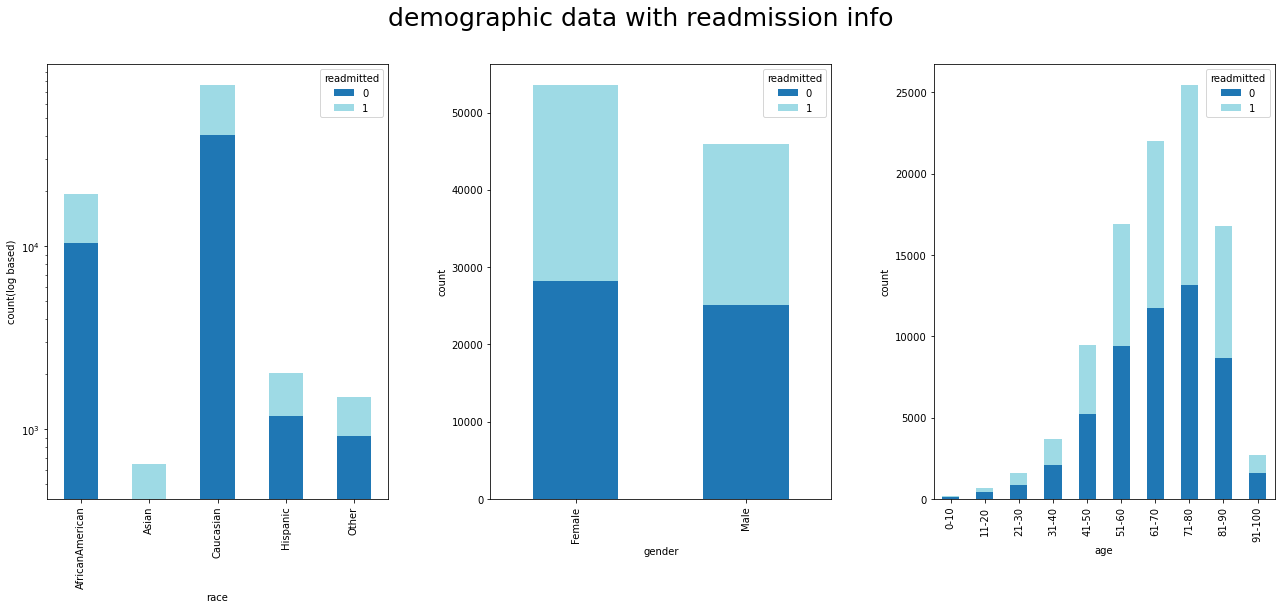

In [60]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(22,8))
ax[0].set_yscale('log')
pd.crosstab(index=diabetes.race,
            columns=diabetes.readmitted).plot.bar(ax=ax[0],
                                                  ylabel='count(log based)',
                                                  stacked=True,
                                                  cmap='tab20')
pd.crosstab(index=diabetes.gender,
            columns=diabetes.readmitted).plot.bar(ax=ax[1],
                                                  ylabel='count',
                                                  stacked=True,
                                                  cmap='tab20')
pd.crosstab(index=diabetes.age,
            columns=diabetes.readmitted).plot.bar(ax=ax[2],
                                                  ylabel='count',
                                                  stacked=True,
                                                  cmap='tab20')
plt.subplots_adjust(wspace=0.3)
plt.suptitle('demographic data with readmission info', size=25)

In [61]:
drug_readmit = diabetes.loc[:,'metformin':'readmitted']
drug_readmit

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
101762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
101763,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
101764,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [147]:
d = pd.DataFrame()
for i in range(len(drug_readmit.columns)-1):
    d = d.append(drug_readmit.groupby([drug_readmit.columns[i]])['readmitted'].mean())
    #print(drug_readmit.groupby([drug_readmit.columns[i]])['readmitted'].mean())

In [148]:
drug_readmit.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [149]:
d.index = drug_readmit.columns[0:-1]
d

,0,1
metformin,0.471083,0.435582
repaglinide,0.462756,0.551341
nateglinide,0.463936,0.489943
chlorpropamide,0.464132,0.447059
glimepiride,0.463624,0.473381
acetohexamide,0.464112,1.000000
glipizide,0.460358,0.490523
glyburide,0.464680,0.459293
tolbutamide,0.464150,0.318182
pioglitazone,0.462444,0.485647


Need to get rid of rows with NA's and investigate why acetohexamide/glimepiride-pioglitazone/metformin-pioglitazone are 0 and 1 - only 1 person was taking these 3 drugs - will need to remove

In [150]:
d = d.dropna()

In [154]:
print(drug_readmit['acetohexamide'].value_counts(),
      drug_readmit['glimepiride-pioglitazone'].value_counts(),
      drug_readmit['metformin-pioglitazone'].value_counts())

0    99491
1        1
Name: acetohexamide, dtype: int64 0    99491
1        1
Name: glimepiride-pioglitazone, dtype: int64 0    99491
1        1
Name: metformin-pioglitazone, dtype: int64


In [155]:
d = d.drop(['acetohexamide','glimepiride-pioglitazone','metformin-pioglitazone'])

<AxesSubplot:title={'center':'17 drugs mean with readmission info'}, ylabel='ratio'>

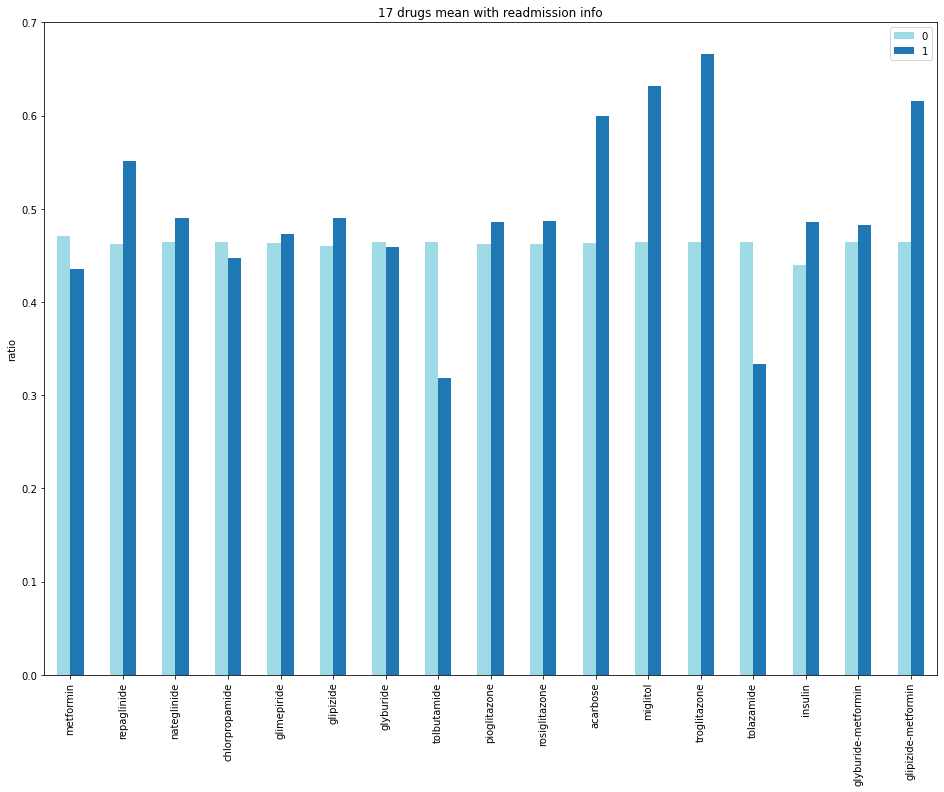

In [163]:
d.plot.bar(figsize=(16,12),title='17 drugs mean with readmission info', cmap='tab20_r', ylabel='ratio')

### numerical features

time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency and number_inpatient

In [24]:
round(diabetes.loc[:,'time_in_hospital':'number_inpatient'].describe(),2).T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,99492.0,4.40,2.99,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,99492.0,43.07,19.70,1.0,31.0,44.0,57.0,132.0
num_procedures,99492.0,1.34,1.70,0.0,0.0,1.0,2.0,6.0
num_medications,99492.0,16.03,8.12,1.0,10.0,15.0,20.0,81.0
number_outpatient,99492.0,0.37,1.28,0.0,0.0,0.0,0.0,42.0
number_emergency,99492.0,0.20,0.94,0.0,0.0,0.0,0.0,76.0
number_inpatient,99492.0,0.64,1.27,0.0,0.0,0.0,1.0,21.0


Text(0.5, 0.98, 'numerical feature distributions (log based)')

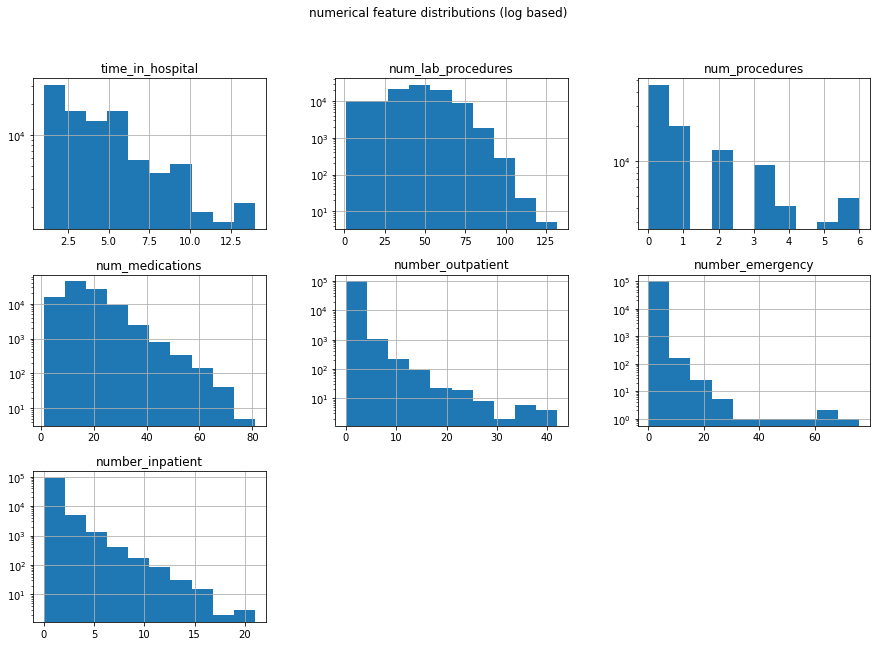

In [43]:
diabetes.loc[:,'time_in_hospital':'number_inpatient'].hist(figsize=(15,10),log=True)
plt.suptitle('numerical feature distributions (log based)')

number_outpatient, number_emergency and number_inpatient are right skewed

### plotting numerical features against target variable readmitted

,mean,std
readmitted,,
0,4.256658,2.965809
1,4.562175,3.002938


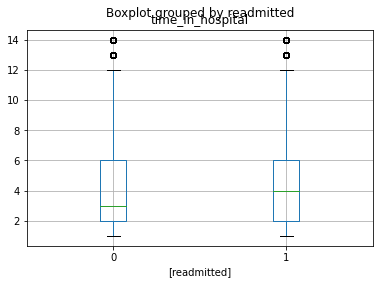

In [44]:
diabetes.boxplot(column=['time_in_hospital'],by = ['readmitted'])
pd.DataFrame(diabetes.groupby( ['readmitted'])['time_in_hospital'].describe().loc[:,['mean','std']])